# Árvores de Decisão e Ensembles

In [8]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

%matplotlib inline

In [9]:
%load_ext autoreload
%autoreload 2

import utils

In [10]:
np.random.seed(42)

plt.rcParams['figure.figsize'] = (8.0, 5.0)

## Usando Árvores de Decisão

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [12]:
x, y = utils.load_dataset('playing')
x

,Outlook,Humidity,Wind
0,sunny,high,strong
1,sunny,high,weak
2,overcast,high,weak
3,rain,high,weak
4,rain,normal,weak
5,rain,normal,strong
6,overcast,normal,strong
7,sunny,high,weak
8,sunny,normal,weak
9,rain,normal,weak


### One-hot encoding
Infelizmente a implementação do SKLearn não suporta atributos categóricos, então temos que usar alguma técnica para codificar os atributos para valores contínuos.

In [18]:
xc = pd.get_dummies(x, prefix_sep='=')
xc

,Outlook=overcast,Outlook=rain,Outlook=sunny,Humidity=high,Humidity=normal,Wind=strong,Wind=weak
0,0,0,1,1,0,1,0
1,0,0,1,1,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,1,0,0,1
4,0,1,0,0,1,0,1
5,0,1,0,0,1,1,0
6,1,0,0,0,1,1,0
7,0,0,1,1,0,0,1
8,0,0,1,0,1,0,1
9,0,1,0,0,1,0,1


In [21]:
dt = DecisionTreeClassifier()
dt.fit(xc, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

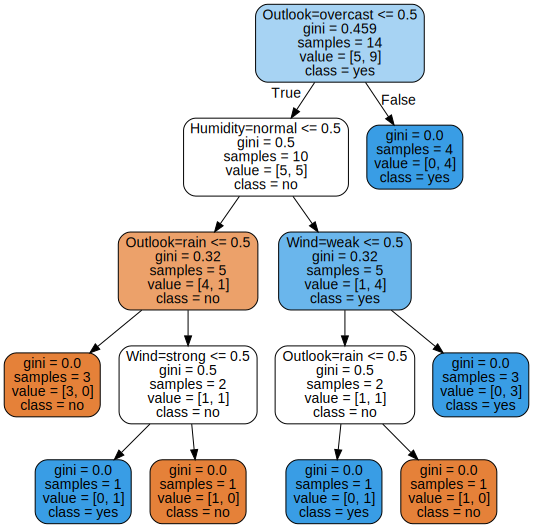

In [22]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=xc.columns,
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Entropia

In [23]:
import scipy.stats as stats
from collections import Counter

Vamos implementar a entropia de Shannon. Considere que o argumento `v` são os valores das classes ex: `[0,1,1,1,0]`.

In [24]:
def entropy(v):
    return stats.entropy(np.array(list(Counter(v).values()))/len(v), base=2)

In [ ]:
?

## Entropia esperada de um split

Agora vamos implementar a entropia esperada. Dessa vez considere que o argumento é uma lista de subconjuntos após um split ex: `[[0,1], [1,0,1,1]]`

In [26]:
def expected_entropy(split):
    n = float(sum(list(map(len, split))))
    return sum([(len(s)/n) * entropy(s) for s in split])

In [27]:
print(expected_entropy([[0,1], [1,0,1,1]]))
print(expected_entropy([[0,0,1,1], [1], [0,1,1]]))

0.874185416306
0.84436093777


## Ganho de Informação

In [28]:
def information_gain(s, h):
    return h - expected_entropy(s)

In [29]:
c1 = [0,1,1,0,1,1]
s11 = [[0,0,1], [1,1,1]]
s12 = [[1,0,1], [0,1,1]]

c2 = [0,1,0,0,0,1]
s2 = [[0,1],[0,0,0,1]]

print(information_gain(s11, entropy(c1)))
print(information_gain(s12, entropy(c1)))
print(information_gain(s2, entropy(c2)))

0.459147917027
0.0
0.0441104177484


## Exercício: Cancer de mama

Nesse exemplo vocês vão treinar uma árvore de decisão para classificar se um tumor é benigno ou maligno. O que deve ser feito:

* Liste os atributos do problema.
* Observe se algum atributo precisa de one-hot e aplique caso necessário.
* Calcule a média, desvio padrão, minimo e máximo de cada atributo (dica, pandas tem um método muito conveniente para isso).
* Observe se o problema é balanceado (o que é isso mesmo? e por que isso é relevante?)
* Separe um conjunto de teste e um de treino (quanto pra cada?)
* Escolha uma métrica de avaliação e avalie o classificador no conjunto de treino e teste.
* Plote a árvore treinada.

In [ ]:
?

## Overfitting e Underfitting

### Exercício

Usando os dados acima de cancer de mama, você deve:

* Treinar vários modelos variando o valor do parâmetro `max_depth` entre 1 e 10
* Plotar um gráfico com duas curvas, max_depth vs acurácia no conjunto de treino, max_depth vs acurácia no conjunto de teste.

Dicas: para os plots, você pode usar 
```
plt.plot(depths, accs_train, label='train')
plt.plot(depths, accs_test, label='test')
plt.legend()```


In [1]:
def plot_accs(values, accs_train, accs_test, param_name):
    plt.plot(values, accs_train, label='train')
    plt.plot(values, accs_test, label='test')
    plt.ylabel('Accuracy')
    plt.xlabel(param_name)
    plt.legend()


values = list(range(1, 10))
accs_train = []
accs_test = []
nodes = []
for value in values:
    ???
        


plot_accs(values, accs_train, accs_test, param_name)

Podemos perceber que o desempenho no conjunto de teste cai a medida que o modelo fica mais complexo tentando se adequar ao conjunto de treino (valores maiores de `max_depth`)

## Melhores parâmetros

In [41]:
dt = DecisionTreeClassifier(max_depth=?, random_state=87)
dt.fit(xtrain, ytrain)

print('Acurácia no treino:', accuracy_score(ytrain, dt.predict(xtrain)))
print('Acurácia no test:', accuracy_score(ytest, dt.predict(xtest)))

Acurácia no treino: 0.980810234542
Acurácia no test: 0.95


In [2]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=xtrain.columns,
                           class_names=target_names,
                           filled=True, rounded=True, 
                           special_characters=True)
graphviz.Source(dot_data)

## Análise e Exploração

In [43]:
x, y = utils.load_dataset('fraud')

In [3]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x, y)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=x.columns,
                           class_names=['legit', 'fraud'],  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)
graphviz.Source(dot_data)

## Ensembling

Nesse exercício vamos observar problemas de overfitting e underfitting e tentar criar ensembles simples parar mitigar tais problemas. Vocês devem:

* Plotar os dados e observar a correlação entre x e y
* Utilizar `DecisionTreeRegressor` para treinar e visualizar um regressor nesses dados
* Experimentar com alguns parâmetros diferentes e observar os efeitos nos modelos
* Iterar N vezes para treinar N modelos diferentes com diferentes amostras dos dados
* Combinar os resultados de todos os modelos e observar o resultado

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x, y = utils.load_dataset('regression')

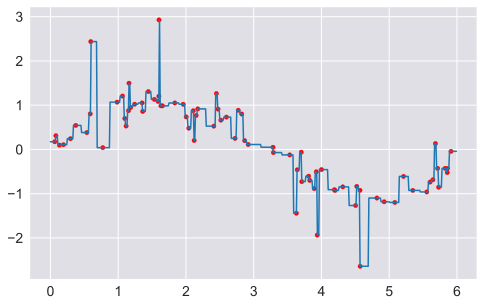

In [18]:
xtest = np.arange(0.0, 6.0, 0.01)[:, np.newaxis]

plt.scatter(x, y, s=20, color="red")
    
dt = DecisionTreeRegressor()
dt.fit(x, y)
ypred = dt.predict(xtest)

plt.plot(xtest, ypred, lw=1.5)

## Florestas Aleatórias

Nesse exercício vocês vão experimentar com alguns modelos de florestas aleatórias. Vocês devem:

* Treinar uma árvore de decisão e uma regressão logística para propósitos de comparação.
* Treinar uma floresta aleatória utilizando a classe `RandomForestClassifier` do sklearn.
* Medir a acurácia em todos modelos utilizando cross-validation com 5 folds.
* Realizar experimentos variando o número de estimadores (de 1 até 50) da floresta aleatória e observar o desempenho.
* Plote um gráfico `#estimadores x acurácia`


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
x, y, target_names = utils.load_dataset('cancer')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=100, random_state=42)

In [21]:
n_estimators = list(range(1,51,1))
accs = []
???


plt.plot(n_estimators, accs)
plt.ylim((0.9,1.0))

## Bagging

Nesse exercício vocês devem:
* Carregar e inspecionar rapidamente o novo dataset
* Utilizar `BaggingClassifier` do sklearn para experimentar com diferentes quantidades de estimadores
* Utilizar `RandomForest` do sklearn para experimentar com diferentes quantidades de estimadores
* Plotar ambos resultados em um gráfico `#estimadores x ROC AUC`
* Notem que estamos usando uma métrica diferente para esse problema, que diferente da acurácia, precisa das probabilidades das classes e não somente a decisão final

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

numpy.random.seed(seed=2)

In [23]:
x, y = utils.load_dataset('default')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [54]:
from sklearn.metrics import roc_auc_score

n_estimators = [1,2,3,4,5,10,15,20,25,30,40]
bag_scores = []
rf_scores = []
for ne in n_estimators:
    ???
    
    bag.fit(xtrain, ytrain)
    rf.fit(xtrain, ytrain)
    
    bag_ypred = bag.predict_proba(xtest)[:,1]
    rf_ypred = rf.predict_proba(xtest)[:,1]

    bag_score = roc_auc_score(ytest, bag_ypred)
    rf_score = roc_auc_score(ytest, rf_ypred)

    bag_scores.append(bag_score)
    rf_scores.append(rf_score)
    
    print(ne, bag_score, rf_score)
    

1 0.834627087941 0.805930863841
2 0.847704986909 0.83421833425
3 0.846441462518 0.844935990727
4 0.84941840689 0.849194181192
5 0.848464577831 0.853866135016
10 0.849231017908 0.856695673819
15 0.853393085367 0.859315847635
20 0.851540948459 0.859453695697
25 0.850351148378 0.859433911422
30 0.853448250422 0.858032989056
40 0.853327266938 0.859300885165


In [24]:
plt.plot(n_estimators, bag_scores, label='bagging')
plt.plot(n_estimators, rf_scores, label='forest')
plt.legend()

# FIM

## Material extra

O material abaixo não pode ser aprensetado em aula por falta de tempo, porém pode ser usado pelos alunos para aprender mais sobre o assunto.

## Limitações de Métodos lineares

Para entender a motivação por trás de árvores de decisão, vamos começar com um exemplo onde regressão logística (e outros métodos lineares) não funcionam muito bem.

In [13]:
x, y = utils.load_dataset('non-linear')

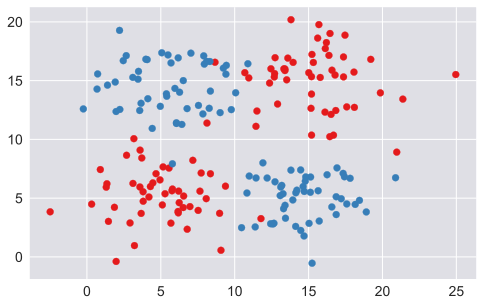

In [14]:
utils.plot2d(x, y)

### Regressão Logística

Vamos tentar resolver essa classificação com o método que aprender na última aula. Primeiro, vamos reservar um conjunto de teste.

In [447]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [448]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [449]:
ypredict = lr.predict(xtest)
accuracy_score(ytest, ypredict)

0.44

Essa acurácia pode ser considerada boa para esse problema? Por que obtivemos esse resultado?

### Fronteira de Decisão

Podemos plotar a fronteira de decisão do classificador para entender melhor o que aconteceu.

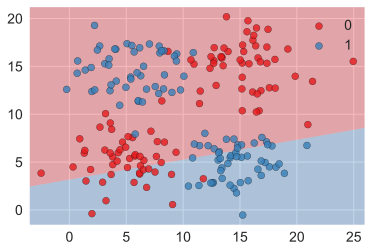

In [18]:
utils.plot2d(x, y, clf=lr)

In [1]:
# utils.plot2d(x, y, clf=lr)

## Nossa primeira árvore de decisão
... sem nem  saber o que é árvore de decisão    ¯\\_(ツ)_/¯ 

Vamos tentar implementar um modelo simples especificamente para prever instâncias desse dataset. Implemente somente o método `predict_one`. Use `x[0]` e `x[1]` para acessar cada variável da instância e tente usar somente `if-else` e operadores de comparação.

In [19]:
class UltimateComplexClassifier():
    def __init__(self):
        pass

    def fit(self):
        pass

    def predict_one(self, x):
        if (x[0]>10):
            if x[1]<10: return 1
            else: return 0
        else:
            if x[1]<10: return 0
            else: return 1


    def predict(self, x):
        return np.array([self.predict_one(xi) for xi in x])


In [20]:
ucc = UltimateComplexClassifier()
yp = ucc.predict(xtest)

accuracy_score(ytest, yp)

0.93999999999999995

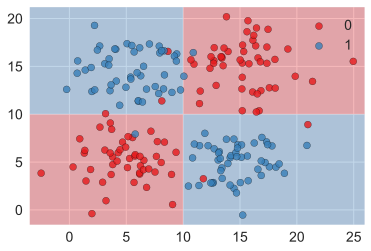

In [21]:
utils.plot2d(x, y, ucc)

Um algoritmo muito simples, porém extremamente efetivo para esse dataset! Vamos aprender a construir esses modelos de forma mais sistemática e genérica.

## Subotimalidade

### Exercício

Para esse exercício simples, vocês devem:
    
* Carregar novamente o primeiro dataset que usamos (non-linear) 
* Treinar uma árvore de decisão nos dados. Ajustem o parâmetro `depth` para um valor que você acham suficiente considerando a natureza dos dados (não é necessário train/test split aqui)
* Usem plot2d para observar a fronteira de decisão. Esse é o resultado que vocês esperavam? Por que isso aconteceu?


##  Variância

In [274]:
x, y, _ = utils.load_dataset('cancer')

In [313]:
ntrials = 20
results = pd.DataFrame(index=range(ntrials), columns=['acc_train', 'acc_test', 'lr_acc_train', 'lr_acc_test',  'tree_nodes', 'tree_depth'])
for i in range(ntrials):

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5)
    dt = DecisionTreeClassifier()
    dt.fit(xtrain, ytrain)

    lr = LogisticRegression()
    lr.fit(xtrain, ytrain)

    ytrain_pred = dt.predict(xtrain)
    ytest_pred = dt.predict(xtest)

    lr_ytrain_pred = lr.predict(xtrain)
    lr_ytest_pred = lr.predict(xtest)

    results.loc[i] = (accuracy_score(ytrain, ytrain_pred), 
                      accuracy_score(ytest, ytest_pred),
                      accuracy_score(ytrain, lr_ytrain_pred), 
                      accuracy_score(ytest, lr_ytest_pred),
                      dt.tree_.node_count, 
                      dt.tree_.max_depth)

results

,acc_train,acc_test,lr_acc_train,lr_acc_test,tree_nodes,tree_depth
0,1,0.936842,0.957746,0.961404,23,5
1,1,0.915789,0.964789,0.947368,27,5
2,1,0.922807,0.940141,0.957895,25,5
3,1,0.929825,0.964789,0.940351,29,8
4,1,0.915789,0.964789,0.929825,21,5
5,1,0.929825,0.961268,0.94386,29,5
6,1,0.898246,0.961268,0.933333,29,7
7,1,0.950877,0.96831,0.940351,21,5
8,1,0.912281,0.964789,0.929825,19,6
9,1,0.919298,0.975352,0.940351,21,5
